In [1]:
import spacy
import pandas as pd
import time
from spacy.matcher import DependencyMatcher
from tqdm import tqdm
import numpy as np

In [2]:
nlp_sm = spacy.load("en_core_web_sm")
nlp_lg = spacy.load("en_core_web_lg")

In [3]:
matcher_sm = DependencyMatcher(nlp_sm.vocab)
matcher_lg = DependencyMatcher(nlp_lg.vocab)

In [4]:
pattern = [
    {
        "RIGHT_ID": "verb",
        "RIGHT_ATTRS": {"POS": "VERB"}
    },
    {
        "LEFT_ID": "verb",
        "REL_OP": ">",
        "RIGHT_ID": "subject",
        "RIGHT_ATTRS": {"DEP": "nsubj", "POS":{"IN": ["NOUN", "PROPN"]}},
    },
    {
        "LEFT_ID": "verb",
        "REL_OP": ">",
        "RIGHT_ID": "object",
        "RIGHT_ATTRS": {"DEP": "dobj"},
    },
]

matcher_sm.add('verb', [pattern])
matcher_lg.add('verb', [pattern])

In [5]:
def get_triplet(nlp, matcher, sentence):
    doc = nlp(sentence)
    matches = matcher(doc)
    
    triplets = []
    for match_id, token_ids in matches:
        subj, verb, obj = (doc[token_ids[1]], doc[token_ids[0]], doc[token_ids[2]])
        subj, verb, obj = (subj.pos_ if subj.pos_ == 'PROPN' else subj.text, verb.text, obj.pos_ if obj.pos_ == 'PROPN' else obj.text)

        triplets.append((subj, verb, obj)) 
    return triplets

In [6]:
with open('1g-word-1m-benchmark-r13output/training-monolingual.tokenized.shuffled/news.en-00001-of-00100') as sentences:
    sentences = sentences.read().split('\n')
    sentences.remove('')

In [7]:
array = np.array([[0, 0, [], 0, []]], dtype=object)
index = -1

In [22]:
loader = tqdm(sentences[50000:75000])
for sentence in loader:
    index += 1
    sm_triplets = get_triplet(nlp_sm, matcher_sm, sentence)
    lg_triplets = get_triplet(nlp_lg, matcher_lg, sentence)
    
    
    array = np.append(array,
              [[
                  index+1, 
                  array[index, 1] + len(sm_triplets),
                  sm_triplets,
                  array[index, 3] + len(lg_triplets),
                  lg_triplets
              ]], axis=0)
    

100%|██████████| 25000/25000 [13:31<00:00, 30.80it/s]


In [9]:
from matplotlib import pyplot as plt

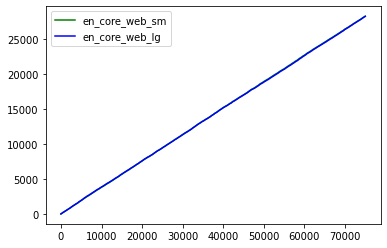

In [55]:
plt.plot(array[:, 0], array[:, 1], color='green', label='en_core_web_sm')
plt.plot(array[:, 0], array[:, 3], color='blue', label='en_core_web_lg')
plt.legend()
plt.show()

In [9]:
n = 5000
array[n, 1],array[n, 3] 

(1911, 1937)

In [10]:
n = 20000
array[n, 1],array[n, 3] 

(7562, 7578)

In [7]:
n = 40000
array[n, 1],array[n, 3] 

(15185, 15164)

In [8]:
n = 60000
array[n, 1],array[n, 3] 

(22668, 22596)

In [59]:
array[n, 1]/n, array[n, 3]/n

(0.3781, 0.3789)

In [2]:
array = np.load('array.npy', allow_pickle=True)

In [3]:
array[:, 2]

array([list([]),
       list([('PROPN', 'advised', 'systems'), ('mildness', 'meant', 'schools')]),
       list([('PROPN', 'invited', 'PROPN')]), ...,
       list([('renaissance', 'continues', 'apace')]),
       list([('package', 'includes', 'loan')]), list([])], dtype=object)